In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [4]:
print(tf.__version__)

2.4.1


# 1. Load Mnist Dataset

In [30]:
mnist = keras.datasets.fashion_mnist

In [7]:
type(mnist)

module

In [31]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()

In [32]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [13]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [14]:
class_names = ['top','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','angle boot']

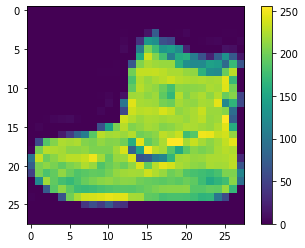

In [17]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()

In [33]:
x_train = x_train/250

In [34]:
x_test = x_test/250

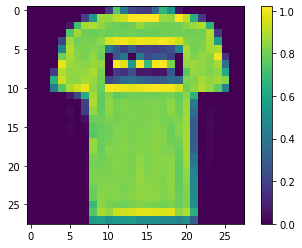

In [20]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

# 2. Build the Model

In [23]:
from tensorflow.keras import models, layers

In [35]:
x_train = x_train.reshape(60000,28,28,1) # here 1 means black and white color, if it is 3, then it means red, yellow, green
x_test = x_test.reshape(10000,28,28,1)

In [25]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)),
        # we have a layer with 32 convolution filters with the filter size 3 by 3
        tf.keras.layers.MaxPooling2D(2,2), # the max pool window is 2 by 2 to select the strongest signal
        tf.keras.layers.Flatten(), # make it a long vector
        tf.keras.layers.Dense(128, activation='relu'), # make the vector with the length of 128
        tf.keras.layers.Dense(10, activation='softmax') #because we have 10 classes so output is 10
        ])

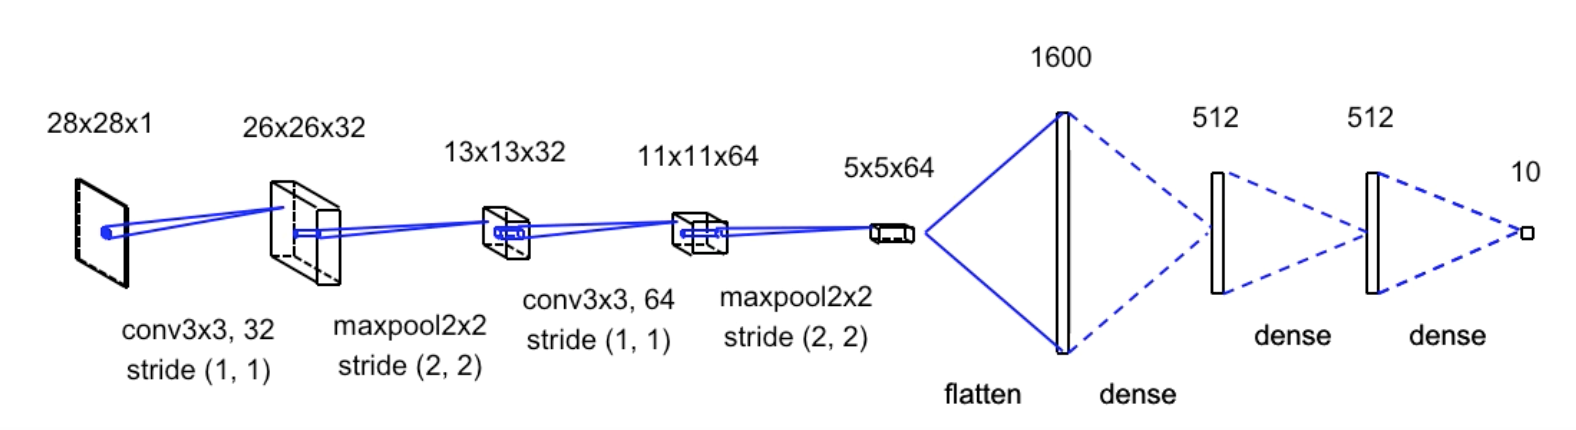

In [26]:
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", 
              metrics=['accuracy'])

## 2.1 Train the Model

In [36]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.5310 - accuracy: 0.8149
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2772 - accuracy: 0.8990
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2275 - accuracy: 0.9168
Epoch 4/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1853 - accuracy: 0.9306
Epoch 5/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1586 - accuracy: 0.9413
Epoch 6/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1360 - accuracy: 0.9509
Epoch 7/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1126 - accuracy: 0.9588
Epoch 8/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0963 - accuracy: 0.9634
Epoch 9/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0792 - accuracy: 0.9710
Epoch 10/10
1875/1875 [==============================] - 37s 20m

## 2.2 Test the Model

In [37]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print("Test accuracy: ", test_acc)

313/313 - 1s - loss: 0.3158 - accuracy: 0.9171
Test accuracy:  0.9171000123023987


In [38]:
from sklearn.metrics import accuracy_score

In [39]:
y_pred = model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [40]:
accuracy_score(y_test,y_pred)

0.9171